# Install packages

In [3]:
!pip install PyMuPDF
! pip install -U git+https://github.com/huggingface/transformers.git
! pip install -U git+https://github.com/huggingface/accelerate.git

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.1/14.1 MB 56.8 MB/s eta 0:00:0000:0100:01
  Cloning https://github.com/huggingface/transformers.git to /tmp/pip-req-build-av61qmel
  Running command git clone --filter=blob:none --quiet https://github.com/huggingface/transformers.git /tmp/pip-req-build-av61qmel
  Resolved https://github.com/huggingface/transformers.git to commit 539e2281cd97c35ef4122757f26c88f44115fa94
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for transformers: filename=transformers-4.30.0.dev0-py3-none-any.whl size=7160079 sha256=1c1c6abe9e095f44ec11293e9f508603da3d528e0fc3893fc4635317f464875d
  Stored in directory: /tmp/pip-ephem-wheel-cache-75krrzb4/wheels/e7/9c/5b/e1a9c8007c343041e61cc484433d512ea9274272e3fcbe7c16
Successfully built transformers
  Attempting uninstall: transformers
    Found existing installation: transformers 4.29.2
    Uninstalling transform

# Load packages

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import fitz
from PIL import Image
import os

In [5]:
!ls '/kaggle/input/oxml2023mlcases-esg-classifier'

data  sample_submission.csv


# Submission

In [6]:
df_sub =  pd.read_csv('/kaggle/input/oxml2023mlcases-esg-classifier/sample_submission.csv')
print(df_sub.shape)
print(df_sub.columns)
df_sub.head()

(466, 2)
Index(['id', 'class'], dtype='object')


,id,class
0,report_1352.pdf.49,environmental
1,report_1835.pdf.143,environmental
2,report_1352.pdf.46,environmental
3,report_1179.pdf.47,environmental
4,report_607.pdf.12,environmental


In [7]:
df_sub['class'].value_counts()

environmental    466
Name: class, dtype: int64

# Exp

In [8]:
!ls '/kaggle/input/oxml2023mlcases-esg-classifier/data'

labels.csv  reports


In [9]:
df =  pd.read_csv('/kaggle/input/oxml2023mlcases-esg-classifier/data/labels.csv')
print(df.shape)
print(df.columns)
df.head()

(1956, 2)
Index(['id', 'class'], dtype='object')


,id,class
0,report_519.pdf.53,governance
1,report_1537.pdf.24,social
2,report_567.pdf.33,governance
3,report_1830.pdf.220,other
4,report_1253.pdf.46,governance


In [10]:
df['class'].value_counts()

other            913
social           466
environmental    345
governance       232
Name: class, dtype: int64

In [11]:
pdfs = glob('/kaggle/input/oxml2023mlcases-esg-classifier/data/reports/*.pdf')
len(pdfs)

57

In [12]:
df['id'].value_counts()

report_1823.pdf.150    2
report_862.pdf.47      2
report_352.pdf.31      2
report_862.pdf.45      2
report_1823.pdf.149    2
                      ..
report_1829.pdf.39     1
report_1667.pdf.12     1
report_1825.pdf.313    1
report_1829.pdf.80     1
report_1833.pdf.55     1
Name: id, Length: 1951, dtype: int64

In [13]:
def visualize_pdf_image(filename, page_number):
    doc = fitz.open(filename)
    page_index = page_number - 1
    pix = doc[page_index].get_pixmap()
    img_page = Image.frombytes("RGB", [pix.width, pix.height], pix.samples)
    return img_page 


In [14]:
data_path = '/kaggle/input/oxml2023mlcases-esg-classifier/data/reports'

In [15]:
print(df_sub['id'][0].split('pdf'))
df_sub['id'][0].split('pdf')[0]+'pdf'


['report_1352.', '.49']


'report_1352.pdf'

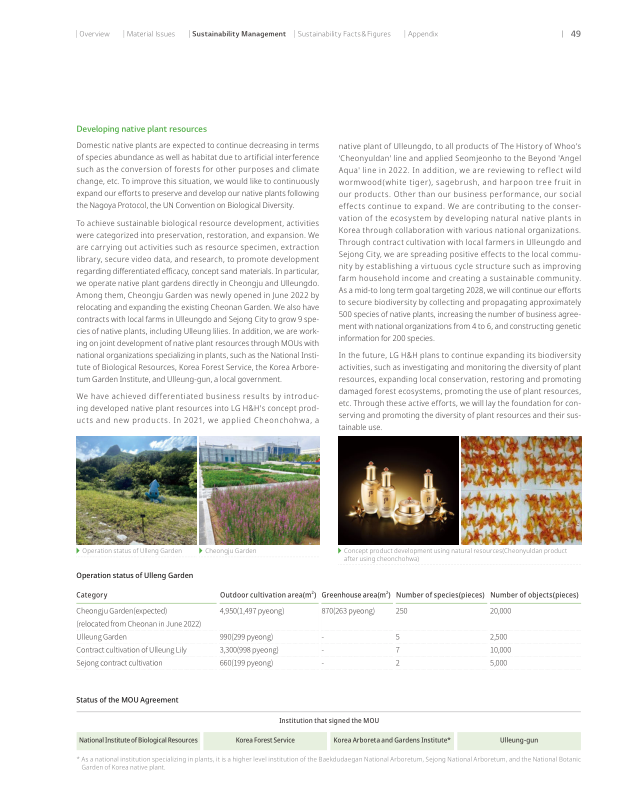

In [16]:
visualize_pdf_image(os.path.join(data_path, df_sub['id'][0].split('pdf')[0]+'pdf'), 49)

In [17]:
def read_page(filename, page_number):
    filepath = filename
    doc = fitz.open(filepath)
    page_index = page_number - 1
    page = doc.load_page(page_index) 
    return page.get_text()

In [18]:
text = read_page(os.path.join(data_path, df_sub['id'][0].split('pdf')[0]+'pdf'), 49)
text

"Developing native plant resources\nDomestic native plants are expected to continue decreasing in terms \nof species abundance as well as habitat due to artificial interference \nsuch as the conversion of forests for other purposes and climate \nchange, etc. To improve this situation, we would like to continuously \nexpand our efforts to preserve and develop our native plants following \nthe Nagoya Protocol, the UN Convention on Biological Diversity.\nTo achieve sustainable biological resource development, activities \nwere categorized into preservation, restoration, and expansion. We \nare carrying out activities such as resource specimen, extraction \nlibrary, secure video data, and research, to promote development \nregarding differentiated efficacy, concept sand materials. In particular, \nwe operate native plant gardens directly in Cheongju and Ulleungdo. \nAmong them, Cheongju Garden was newly opened in June 2022 by \nrelocating and expanding the existing Cheonan Garden. We also 

In [19]:
text = text.replace('\n', ' ')
text

"Developing native plant resources Domestic native plants are expected to continue decreasing in terms  of species abundance as well as habitat due to artificial interference  such as the conversion of forests for other purposes and climate  change, etc. To improve this situation, we would like to continuously  expand our efforts to preserve and develop our native plants following  the Nagoya Protocol, the UN Convention on Biological Diversity. To achieve sustainable biological resource development, activities  were categorized into preservation, restoration, and expansion. We  are carrying out activities such as resource specimen, extraction  library, secure video data, and research, to promote development  regarding differentiated efficacy, concept sand materials. In particular,  we operate native plant gardens directly in Cheongju and Ulleungdo.  Among them, Cheongju Garden was newly opened in June 2022 by  relocating and expanding the existing Cheonan Garden. We also have  contract

In [20]:
df['id'][0].split('pdf')

['report_519.', '.53']

In [21]:
def get_text_by_row(row):
    filename, page = row['id'].split('pdf')
    page = int(page[1:])
    #print(filename, page)
    
    text = read_page(os.path.join(data_path, filename+'pdf'), page)
    return text.replace('\n', ' ')

In [22]:
df['text'] = df.apply(lambda row: get_text_by_row(row), axis = 1)
df.head()

,id,class,text
0,report_519.pdf.53,governance,2021 ESG Impact Report ...
1,report_1537.pdf.24,social,24 2021 SUSTAINABILITY REPORT TABLE OF CONTENT...
2,report_567.pdf.33,governance,Sustainability Governance Clean Harbors’ commi...
3,report_1830.pdf.220,other,220 Report of the réviseur d’entreprises agréé...
4,report_1253.pdf.46,governance,Pfizer 2021 ESG Report 46 Governance Governanc...


In [23]:
# from tensorflow.keras.preprocessing.text import Tokenizer
# def my_lemmitezer(text):
#     ntoken = Tokenizer()
#     ntoken.fit_on_texts(text)
#     return text_to_word_sequence(text)

In [24]:
df['long_text'] = df.text.apply(lambda x : len(x.split()))

In [25]:
df.describe()

,long_text
count,1956.000000
mean,496.446319
std,255.223558
min,2.000000
25%,306.750000
50%,465.000000
75%,674.250000
max,1533.000000


https://towardsdatascience.com/text-classification-with-bert-in-pytorch-887965e5820f

# Workflow
- Remove stopwords
- Lemmatize 
- Stemm
- Running for training the  classify model

In [26]:
import torch
import numpy as np
#from keras.preprocessing.text import Tokenizer
from transformers import BertTokenizer

In [27]:
# # for TPU
# import torch_xla
# import torch_xla.core.xla_model as xm

In [28]:
# device = xm.xla_device()
# device

In [29]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased')


In [30]:
labels = {'other':0,
          'social':1,
          'environmental':2,
          'governance':3
          }

In [31]:

class Dataset(torch.utils.data.Dataset):

    def __init__(self, df):

        self.labels = [labels[label] for label in df['class']]
        self.texts = [tokenizer(text, 
                               padding='max_length', max_length = 512, truncation=True,
                                return_tensors="pt") for text in df['text']]
        
    def classes(self):
        return self.labels

    def __len__(self):
        return len(self.labels)

    def get_batch_labels(self, idx):
        return np.array(self.labels[idx])

    def get_batch_texts(self, idx):
        return self.texts[idx]

    def __getitem__(self, idx):

        batch_texts = self.get_batch_texts(idx)
        batch_y = self.get_batch_labels(idx)

        return batch_texts, batch_y

In [32]:
import numpy as np
np.random.seed(112)

df_train, df_val, df_test = np.split(df.sample(frac=1, random_state=42), 
                                     [int(.8*len(df)), int(.9*len(df))])

print(len(df_train),len(df_val), len(df_test))

1564 196 196


In [33]:
from torch import nn
from transformers import BertModel

class BertClassifier(nn.Module):

    def __init__(self, dropout=0.5):

        super(BertClassifier, self).__init__()

        self.bert = BertModel.from_pretrained('bert-base-cased')
        self.dropout = nn.Dropout(dropout)
        self.linear = nn.Linear(768, 4)
        self.relu = nn.ReLU()

    def forward(self, input_id, mask):

        _, pooled_output = self.bert(input_ids= input_id, attention_mask=mask,return_dict=False)
        dropout_output = self.dropout(pooled_output)
        linear_output = self.linear(dropout_output)
        final_layer = self.relu(linear_output)

        return final_layer

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [34]:
import torch
torch.cuda.is_available()

True

In [35]:
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_data, val_data, learning_rate, epochs):

    train, val = Dataset(train_data), Dataset(val_data)

    train_dataloader = torch.utils.data.DataLoader(train, batch_size=2, shuffle=True)
    val_dataloader = torch.utils.data.DataLoader(val, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "tpu")

    criterion = nn.CrossEntropyLoss()
    optimizer = Adam(model.parameters(), lr= learning_rate)

    if use_cuda:

            model = model.cuda()
            criterion = criterion.cuda()

    for epoch_num in range(epochs):

            total_acc_train = 0
            total_loss_train = 0

            for train_input, train_label in tqdm(train_dataloader):

                train_label = train_label.to(device)
                mask = train_input['attention_mask'].to(device)
                input_id = train_input['input_ids'].squeeze(1).to(device)

                output = model(input_id, mask)
                
                batch_loss = criterion(output, train_label.long())
                total_loss_train += batch_loss.item()
                
                acc = (output.argmax(dim=1) == train_label).sum().item()
                total_acc_train += acc

                model.zero_grad()
                batch_loss.backward()
                optimizer.step()
            
            total_acc_val = 0
            total_loss_val = 0

            with torch.no_grad():

                for val_input, val_label in val_dataloader:

                    val_label = val_label.to(device)
                    mask = val_input['attention_mask'].to(device)
                    input_id = val_input['input_ids'].squeeze(1).to(device)

                    output = model(input_id, mask)

                    batch_loss = criterion(output, val_label.long())
                    total_loss_val += batch_loss.item()
                    
                    acc = (output.argmax(dim=1) == val_label).sum().item()
                    total_acc_val += acc
            
            print(
                f'Epochs: {epoch_num + 1} | Train Loss: {total_loss_train / len(train_data): .3f} \
                | Train Accuracy: {total_acc_train / len(train_data): .3f} \
                | Val Loss: {total_loss_val / len(val_data): .3f} \
                | Val Accuracy: {total_acc_val / len(val_data): .3f}')
                  
EPOCHS = 50
model = BertClassifier()
LR = 1e-6

#model = model.to(device)

train(model, df_train, df_val, LR, EPOCHS)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
100%|██████████| 782/782 [02:47<00:00,  4.66it/s]


Epochs: 1 | Train Loss:  0.646                 | Train Accuracy:  0.402                 | Val Loss:  0.532                 | Val Accuracy:  0.582


100%|██████████| 782/782 [02:47<00:00,  4.66it/s]


Epochs: 2 | Train Loss:  0.471                 | Train Accuracy:  0.632                 | Val Loss:  0.393                 | Val Accuracy:  0.704


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 3 | Train Loss:  0.378                 | Train Accuracy:  0.709                 | Val Loss:  0.352                 | Val Accuracy:  0.724


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 4 | Train Loss:  0.310                 | Train Accuracy:  0.799                 | Val Loss:  0.317                 | Val Accuracy:  0.781


100%|██████████| 782/782 [02:47<00:00,  4.66it/s]


Epochs: 6 | Train Loss:  0.230                 | Train Accuracy:  0.846                 | Val Loss:  0.261                 | Val Accuracy:  0.776


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 7 | Train Loss:  0.196                 | Train Accuracy:  0.863                 | Val Loss:  0.236                 | Val Accuracy:  0.816


100%|██████████| 782/782 [02:47<00:00,  4.66it/s]


Epochs: 8 | Train Loss:  0.181                 | Train Accuracy:  0.865                 | Val Loss:  0.217                 | Val Accuracy:  0.801


100%|██████████| 782/782 [02:47<00:00,  4.66it/s]


Epochs: 9 | Train Loss:  0.162                 | Train Accuracy:  0.879                 | Val Loss:  0.208                 | Val Accuracy:  0.832


100%|██████████| 782/782 [02:47<00:00,  4.66it/s]


Epochs: 10 | Train Loss:  0.134                 | Train Accuracy:  0.926                 | Val Loss:  0.187                 | Val Accuracy:  0.893


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 11 | Train Loss:  0.087                 | Train Accuracy:  0.978                 | Val Loss:  0.148                 | Val Accuracy:  0.898


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 12 | Train Loss:  0.063                 | Train Accuracy:  0.987                 | Val Loss:  0.104                 | Val Accuracy:  0.934


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 13 | Train Loss:  0.043                 | Train Accuracy:  0.990                 | Val Loss:  0.143                 | Val Accuracy:  0.908


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 14 | Train Loss:  0.036                 | Train Accuracy:  0.992                 | Val Loss:  0.128                 | Val Accuracy:  0.923


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 15 | Train Loss:  0.031                 | Train Accuracy:  0.992                 | Val Loss:  0.124                 | Val Accuracy:  0.923


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 16 | Train Loss:  0.023                 | Train Accuracy:  0.993                 | Val Loss:  0.149                 | Val Accuracy:  0.913


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 17 | Train Loss:  0.019                 | Train Accuracy:  0.995                 | Val Loss:  0.141                 | Val Accuracy:  0.918


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 18 | Train Loss:  0.018                 | Train Accuracy:  0.996                 | Val Loss:  0.145                 | Val Accuracy:  0.918


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 19 | Train Loss:  0.015                 | Train Accuracy:  0.996                 | Val Loss:  0.134                 | Val Accuracy:  0.934


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 20 | Train Loss:  0.011                 | Train Accuracy:  0.997                 | Val Loss:  0.158                 | Val Accuracy:  0.908


100%|██████████| 782/782 [02:47<00:00,  4.65it/s]


Epochs: 21 | Train Loss:  0.012                 | Train Accuracy:  0.997                 | Val Loss:  0.139                 | Val Accuracy:  0.923


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 22 | Train Loss:  0.018                 | Train Accuracy:  0.991                 | Val Loss:  0.122                 | Val Accuracy:  0.934


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 23 | Train Loss:  0.010                 | Train Accuracy:  0.995                 | Val Loss:  0.162                 | Val Accuracy:  0.908


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 24 | Train Loss:  0.008                 | Train Accuracy:  0.996                 | Val Loss:  0.144                 | Val Accuracy:  0.929


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 25 | Train Loss:  0.007                 | Train Accuracy:  0.997                 | Val Loss:  0.168                 | Val Accuracy:  0.913


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 26 | Train Loss:  0.009                 | Train Accuracy:  0.996                 | Val Loss:  0.155                 | Val Accuracy:  0.918


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 27 | Train Loss:  0.007                 | Train Accuracy:  0.997                 | Val Loss:  0.174                 | Val Accuracy:  0.913


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 28 | Train Loss:  0.008                 | Train Accuracy:  0.996                 | Val Loss:  0.159                 | Val Accuracy:  0.923


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 29 | Train Loss:  0.007                 | Train Accuracy:  0.996                 | Val Loss:  0.165                 | Val Accuracy:  0.923


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 30 | Train Loss:  0.006                 | Train Accuracy:  0.997                 | Val Loss:  0.174                 | Val Accuracy:  0.918


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 31 | Train Loss:  0.007                 | Train Accuracy:  0.996                 | Val Loss:  0.148                 | Val Accuracy:  0.934


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 32 | Train Loss:  0.007                 | Train Accuracy:  0.995                 | Val Loss:  0.157                 | Val Accuracy:  0.923


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 33 | Train Loss:  0.008                 | Train Accuracy:  0.996                 | Val Loss:  0.156                 | Val Accuracy:  0.923


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 34 | Train Loss:  0.005                 | Train Accuracy:  0.996                 | Val Loss:  0.190                 | Val Accuracy:  0.908


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 35 | Train Loss:  0.005                 | Train Accuracy:  0.996                 | Val Loss:  0.168                 | Val Accuracy:  0.913


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 36 | Train Loss:  0.005                 | Train Accuracy:  0.996                 | Val Loss:  0.179                 | Val Accuracy:  0.903


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 37 | Train Loss:  0.004                 | Train Accuracy:  0.997                 | Val Loss:  0.180                 | Val Accuracy:  0.918


100%|██████████| 782/782 [02:47<00:00,  4.65it/s]


Epochs: 38 | Train Loss:  0.004                 | Train Accuracy:  0.996                 | Val Loss:  0.182                 | Val Accuracy:  0.918


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 39 | Train Loss:  0.005                 | Train Accuracy:  0.996                 | Val Loss:  0.197                 | Val Accuracy:  0.908


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 40 | Train Loss:  0.004                 | Train Accuracy:  0.997                 | Val Loss:  0.174                 | Val Accuracy:  0.918


100%|██████████| 782/782 [02:47<00:00,  4.66it/s]


Epochs: 41 | Train Loss:  0.008                 | Train Accuracy:  0.996                 | Val Loss:  0.147                 | Val Accuracy:  0.939


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 42 | Train Loss:  0.004                 | Train Accuracy:  0.996                 | Val Loss:  0.168                 | Val Accuracy:  0.939


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 43 | Train Loss:  0.004                 | Train Accuracy:  0.996                 | Val Loss:  0.186                 | Val Accuracy:  0.918


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 44 | Train Loss:  0.003                 | Train Accuracy:  0.997                 | Val Loss:  0.198                 | Val Accuracy:  0.918


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 45 | Train Loss:  0.005                 | Train Accuracy:  0.996                 | Val Loss:  0.192                 | Val Accuracy:  0.913


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 46 | Train Loss:  0.004                 | Train Accuracy:  0.996                 | Val Loss:  0.163                 | Val Accuracy:  0.929


100%|██████████| 782/782 [02:47<00:00,  4.66it/s]


Epochs: 47 | Train Loss:  0.004                 | Train Accuracy:  0.996                 | Val Loss:  0.206                 | Val Accuracy:  0.918


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 48 | Train Loss:  0.003                 | Train Accuracy:  0.997                 | Val Loss:  0.201                 | Val Accuracy:  0.913


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 49 | Train Loss:  0.004                 | Train Accuracy:  0.996                 | Val Loss:  0.212                 | Val Accuracy:  0.918


100%|██████████| 782/782 [02:48<00:00,  4.65it/s]


Epochs: 50 | Train Loss:  0.004                 | Train Accuracy:  0.996                 | Val Loss:  0.213                 | Val Accuracy:  0.913


In [36]:
def evaluate(model, test_data):

    test = Dataset(test_data)

    test_dataloader = torch.utils.data.DataLoader(test, batch_size=2)

    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda" if use_cuda else "cpu")

    if use_cuda:
        model = model.cuda()

    total_acc_test = 0
    with torch.no_grad():

        for test_input, test_label in test_dataloader:

              test_label = test_label.to(device)
              mask = test_input['attention_mask'].to(device)
              input_id = test_input['input_ids'].squeeze(1).to(device)

              output = model(input_id, mask)

              acc = (output.argmax(dim=1) == test_label).sum().item()
              total_acc_test += acc
    
    print(f'Test Accuracy: {total_acc_test / len(test_data): .3f}')
    
evaluate(model, df_test)

Test Accuracy:  0.929


In [37]:
df_sub['text'] = df_sub.apply(lambda row: get_text_by_row(row).lower(), axis = 1)
df_sub.head()

,id,class,text
0,report_1352.pdf.49,environmental,developing native plant resources domestic nat...
1,report_1835.pdf.143,environmental,board of directors corporate information chan ...
2,report_1352.pdf.46,environmental,water resources risk management coca-cola bev...
3,report_1179.pdf.47,environmental,fy21 esg data disclosures 2022 unaudited 42 go...
4,report_607.pdf.12,environmental,nudging healthier choices in school canteens ...


In [38]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [39]:
model.eval()
prediccions = []
with torch.no_grad():
    for idx, row in df_sub.iterrows():
        text = row['text']
        tokens = tokenizer(text, padding='max_length', max_length = 512, truncation=True, return_tensors="pt") 
        mask = tokens['attention_mask'].to(device)
        input_id = tokens['input_ids'].squeeze(1).to(device)
        output = model(input_id, mask)
        pred = output.argmax(dim=1)
        
        prediccions.append(pred.item())
        #break

In [40]:
labels

{'other': 0, 'social': 1, 'environmental': 2, 'governance': 3}

In [41]:
pred_labels = {
    0: 'other',
    1: 'social',
    2: 'environmental',
    3: 'governance'
}

In [42]:
prediccions_labels = [pred_labels[pred_idx] for pred_idx in prediccions]
prediccions_labels

['environmental',
 'other',
 'environmental',
 'social',
 'social',
 'environmental',
 'social',
 'environmental',
 'social',
 'social',
 'environmental',
 'social',
 'other',
 'social',
 'other',
 'environmental',
 'social',
 'governance',
 'social',
 'other',
 'governance',
 'governance',
 'environmental',
 'governance',
 'environmental',
 'social',
 'environmental',
 'other',
 'social',
 'social',
 'environmental',
 'social',
 'other',
 'social',
 'other',
 'other',
 'environmental',
 'social',
 'other',
 'other',
 'environmental',
 'environmental',
 'other',
 'environmental',
 'environmental',
 'governance',
 'social',
 'social',
 'environmental',
 'environmental',
 'governance',
 'environmental',
 'other',
 'governance',
 'social',
 'social',
 'environmental',
 'other',
 'social',
 'environmental',
 'governance',
 'social',
 'other',
 'governance',
 'environmental',
 'environmental',
 'environmental',
 'social',
 'environmental',
 'environmental',
 'environmental',
 'governance',


In [43]:
df_sub['class'] = prediccions_labels
df_sub.head()

,id,class,text
0,report_1352.pdf.49,environmental,developing native plant resources domestic nat...
1,report_1835.pdf.143,other,board of directors corporate information chan ...
2,report_1352.pdf.46,environmental,water resources risk management coca-cola bev...
3,report_1179.pdf.47,social,fy21 esg data disclosures 2022 unaudited 42 go...
4,report_607.pdf.12,social,nudging healthier choices in school canteens ...


In [44]:
df_sub_c = df_sub.copy()
df_sub_c = df_sub_c.drop(labels='text', axis = 1)
df_sub_c.head()

,id,class
0,report_1352.pdf.49,environmental
1,report_1835.pdf.143,other
2,report_1352.pdf.46,environmental
3,report_1179.pdf.47,social
4,report_607.pdf.12,social


In [45]:
df_sub_c.to_csv('submission2.csv', index=False)

In [47]:
df_last = pd.read_csv('submission2.csv')
df_last.head()

,id,class
0,report_1352.pdf.49,environmental
1,report_1835.pdf.143,other
2,report_1352.pdf.46,environmental
3,report_1179.pdf.47,social
4,report_607.pdf.12,social


In [48]:
!kaggle competitions submit -c oxml2023mlcases-esg-classifier -f submission2.csv -m "Message"

Traceback (most recent call last):
  File "/opt/conda/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/opt/conda/lib/python3.10/site-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/opt/conda/lib/python3.10/site-packages/kaggle/api/kaggle_api_extended.py", line 164, in authenticate
    raise IOError('Could not find {}. Make sure it\'s located in'
OSError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.
